<a href="https://colab.research.google.com/github/fonteleslrivka/Emergence-of-Causal-Order-from-a-Pre-Geometric-Substrate/blob/main/Fig%2C_Phase_Behavior_Beta_Sweep_Test_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:61: SyntaxWarning: invalid escape sequence '\l'
<>:61: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-74576697.py:61: SyntaxWarning: invalid escape sequence '\l'
  ax1.set_ylabel('Dominance Ratio ($\lambda_1 / \lambda_2$)', color=color)


Iniciando varredura de Beta (Beta Sweep)...
Gráfico 'fig_beta_sweep.png' gerado com sucesso!


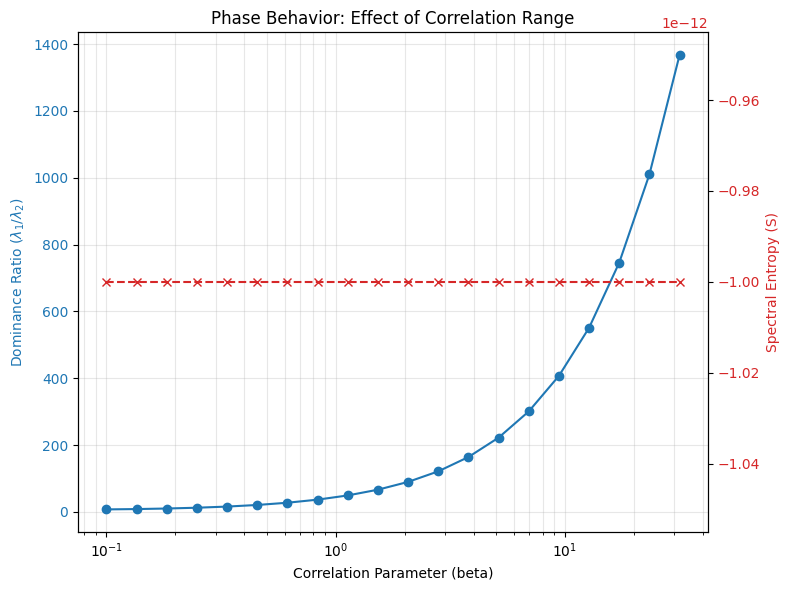

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.linalg import eigsh

def run_beta_sweep():
    print("Iniciando varredura de Beta (Beta Sweep)...")

    # Parâmetros reduzidos para rodar rápido no laptop
    N = 512
    d = 3
    eps = 1e-12

    # Gera geometria fixa para o teste (para isolar o efeito do Beta)
    X = np.random.normal(0, 1, (N, d))
    # Normaliza para a esfera (opcional, mas bom para estabilidade)
    norms = np.linalg.norm(X, axis=1, keepdims=True)
    X = X / norms
    D_condensed = pdist(X)
    D = squareform(D_condensed)

    # Lista de betas (de correlação curta a longa)
    betas = np.logspace(-1, 1.5, 20) # Vai de 0.1 até ~30

    ratio_1_2 = [] # Razão lambda1 / lambda2
    entropy_list = []

    for beta in betas:
        # 1. Calcula Rho e g
        rho = np.exp(-D / beta)
        # Normalização Softmax estável
        rho_sum = np.sum(rho)
        rho_norm = rho / rho_sum

        g = -np.log(rho_norm + eps)

        # 2. Espectro (Top 2 é suficiente para ver o gap)
        # Usamos 'LM' (Largest Magnitude) para pegar os dominantes
        vals = np.linalg.eigvalsh(g) # eigvalsh é melhor para simétricas densas que eigsh as vezes
        vals = np.sort(np.abs(vals))[::-1] # Ordena decrescente

        lambda1 = vals[0]
        lambda2 = vals[1]

        # Razão de Dominância
        ratio = lambda1 / (lambda2 + eps)
        ratio_1_2.append(ratio)

        # Entropia Espectral (simplificada)
        # Softmax nos autovalores para calcular entropia
        w = np.exp(vals - vals.max())
        p = w / w.sum()
        S = -np.sum(p * np.log(p + eps))
        entropy_list.append(S)

    # --- PLOTAGEM ---
    fig, ax1 = plt.subplots(figsize=(8, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Correlation Parameter (beta)')
    ax1.set_ylabel('Dominance Ratio ($\lambda_1 / \lambda_2$)', color=color)
    ax1.plot(betas, ratio_1_2, color=color, marker='o', label='Dominance')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xscale('log') # Escala log para ver melhor
    ax1.grid(True, which="both", ls="-", alpha=0.3)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Spectral Entropy (S)', color=color)
    ax2.plot(betas, entropy_list, color=color, marker='x', linestyle='--', label='Entropy')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Phase Behavior: Effect of Correlation Range')
    fig.tight_layout()
    plt.savefig('fig_beta_sweep.png', dpi=300)
    print("Gráfico 'fig_beta_sweep.png' gerado com sucesso!")

# Executar
run_beta_sweep()